In [2]:
from self_organizing_map import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pylab
import seaborn as sns
import matplotlib.ticker as mticker
import parse
s_fmt = mticker.ScalarFormatter(useMathText=True)

sns.set_style(style='whitegrid')  # for plots, set_theme didn't work for me..
pylab.rcParams['figure.dpi'] = 150

## Animals

In [3]:
# animals

# load data
animals_fts = np.fromfile('data/animals.dat', sep=',')
animals_fts = animals_fts.reshape((32, 84))
labels = []
with open('data/animalnames.txt', 'r') as fp:
    for line in fp.readlines():
        labels.append(line.strip()[1:-1])
        # [1: -1] is to remove extra quotation marks

som = SelfOrganizingMap(
    topology=LinearSOMTopology(nnodes=100,
                               starting_neighbor_d=50,
                               neighborhood_decay_fn=lambda d0, d, epoch: d0 - int(2.5 * epoch)))
som.train(animals_fts, n_epochs=25, eta=0.25)
results = som.map(animals_fts)

animal_df = pd.DataFrame(data={'animal': labels, 'node': results}) \
    .set_index('animal')
animal_df = animal_df.sort_values('node')
animal_df

,node
animal,
cat,0
lion,0
bear,3
dog,4
hyena,6
walrus,7
rat,8
bat,10
skunk,12


## Cyclic Tour

City coords: 
[[0.4    0.4439]
 [0.2439 0.1463]
 [0.1707 0.2293]
 [0.2293 0.761 ]
 [0.5171 0.9414]
 [0.8732 0.6536]
 [0.6878 0.5219]
 [0.8488 0.3609]
 [0.6683 0.2536]
 [0.6195 0.2634]]


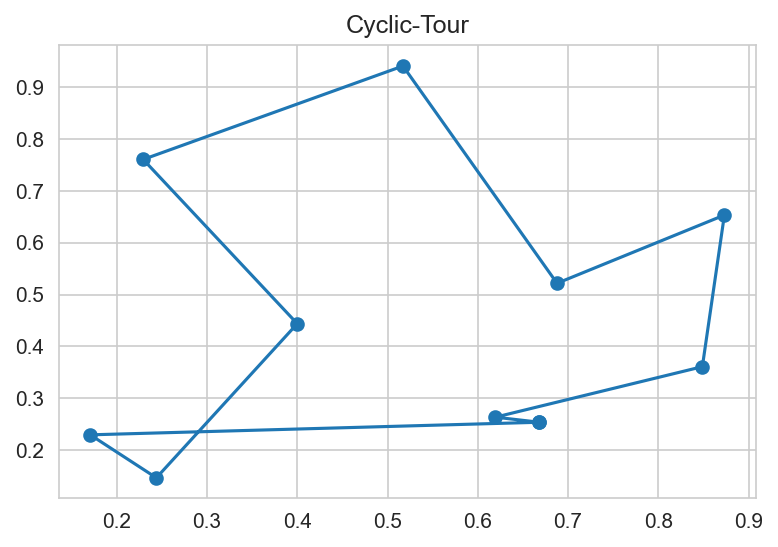

In [4]:
# cyclic tour

# load data
cities = []
with open('data/cities.dat', 'r') as fp:
    for line in fp.readlines():
        if line.startswith('%'):
            # skip comments
            continue
            
        tokens = parse.search('{x_coord:f}, {y_coord:f};', line)
        if tokens is not None:
            cities.append([tokens['x_coord'], tokens['y_coord']])

cities = np.array(cities)
print('City coords: ')
print(cities)
            
som = SelfOrganizingMap(
    topology=CircularSOMTopology(nnodes=10,
                                   starting_neighbor_d=2,
                                   neighborhood_decay_fn=lambda d0, d, epoch: d0 - (epoch // 10)))
som.train(cities, n_epochs=25, eta=0.25)
results = som.map(cities)

cities_df = pd.DataFrame(data={'city': [f'{c}' for c in cities], 'node': results}) \
    .set_index('city')
cities_df = cities_df.sort_values('node')
cities_df

# Plot cyclic tour
tour = np.argsort(results)
tour = np.append(tour, tour[0])
plt.scatter(cities[tour][:, 0], cities[tour][:, 1])
plt.title('Cyclic-Tour')
plt.plot(cities[tour][:, 0], cities[tour][:, 1])
plt.show()

## Votes of MP:s

In [8]:
# load data
votes=np.loadtxt('data/votes.dat', comments="%", delimiter=',').reshape((349, 31))
genders = np.loadtxt('data/mpsex.dat', comments="%")
parties = np.loadtxt('data/mpparty.dat', comments="%")
districts = np.loadtxt('data/mpdistrict.dat', comments="%")
            
som = SelfOrganizingMap(
    topology=GridSOMTopology(nrows=349,
                                   ncols=31, starting_neighbor_d=50,
                                   neighborhood_decay_fn=lambda d0, d, epoch: d0 - (epoch // 10)))
som.train(votes, n_epochs=20, eta=0.2)
results = som.map(votes)


In [25]:
print(results)
labels=np.linspace(1, 349, num=349, axis=0)

[ 6089  2313  2285  6089  5850  2285  3343  1765  1733  2313  8627  5850
  1973  6089  3343  8627  3343  2313  5850 10511  5850  6089  5850  7483
  5850  2251  5850  2251  1733  2363  2251  7126  3343  5850  9115  6089
  9115  6089  2214 10511  5850  5850  5850  5850 10459  5850  6089  8627
  6089  5850  1640  2285  2311  1733  6205  5850  6089  2313  2313  3343
  5054  2313  2214  7483  1733  2313  2313  5850  6089  3343  5054  5850
  6089  5850  5850  2212  7126  5850  9842  2313  6089  1671  5850  5850
  5850  8627  5850  1733  3343  2313  5054  6089  5850  3343  5850  5850
  1733  9115  5054  6089  5850  8627  6089  2313  5850  5850  1642  8822
  6089  2212  2141  5850  5850  6205  5850  5054  1640  9115  5850  6089
  2313  6089  5054  2363  5850  7126  8627  2313  5054  8627  1642  6089
  3343  1973  1673  5850  2313  5850  5850  5850  5850  7483  8627  2313
  5850  5850  1642  5850  5850  3343  5850  6089  2313  6089  7126  8627
  6089  5850  5850  3343  5850 10511  8822  6089  1